In [573]:
import pandas as pd
import ast
import re

In [574]:
df = pd.read_json("waitrose.json")
df.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,matching_rules,display_text_range,retweeted_status,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,scopes
0,2020-07-29 10:28:58,1288421250000000000,1288421250000000000,RT @HelpThemHelpUs_: Our friends at @Potsandco...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Tue Jul 28 16:29:56 +0000 2020...,NaN,NaN,NaN,None,None,None,NaN
1,2020-11-17 16:31:19,1328737494000000000,1328737494000000000,@HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...,"<a href=""http://twitter.com/download/iphone"" r...",False,1.328654e+18,1.328654e+18,1.327758e+18,1.327758e+18,...,[{'tag': None}],"[57, 133]",None,NaN,NaN,NaN,None,None,None,NaN
2,2020-02-28 20:19:01,1233486785000000000,1233486785000000000,@waitrose the wine you delivered yesterday was...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,4.632874e+07,4.632874e+07,...,[{'tag': None}],None,None,NaN,NaN,NaN,None,None,None,NaN
3,2020-11-13 09:21:04,1327179666000000256,1327179666000000256,RT @jlandpartners: This Christmas we want to #...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Fri Nov 13 07:00:00 +0000 2020...,NaN,NaN,NaN,None,None,None,NaN
4,2020-06-04 20:54:01,1268647218000000000,1268647218000000000,RT @RebeccaTillett1: @waitrose if the U.K. ach...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Thu Jun 04 16:31:25 +0000 2020...,NaN,NaN,NaN,None,None,None,NaN


## 1.Data overview

In [575]:
df.shape

(24802, 37)

In [576]:
df.dtypes

created_at                   datetime64[ns]
id                                    int64
id_str                                int64
text                                 object
source                               object
truncated                              bool
in_reply_to_status_id               float64
in_reply_to_status_id_str           float64
in_reply_to_user_id                 float64
in_reply_to_user_id_str             float64
in_reply_to_screen_name              object
user                                 object
geo                                  object
coordinates                          object
place                                object
contributors                        float64
is_quote_status                        bool
extended_tweet                       object
quote_count                           int64
reply_count                           int64
retweet_count                         int64
favorite_count                        int64
entities                        

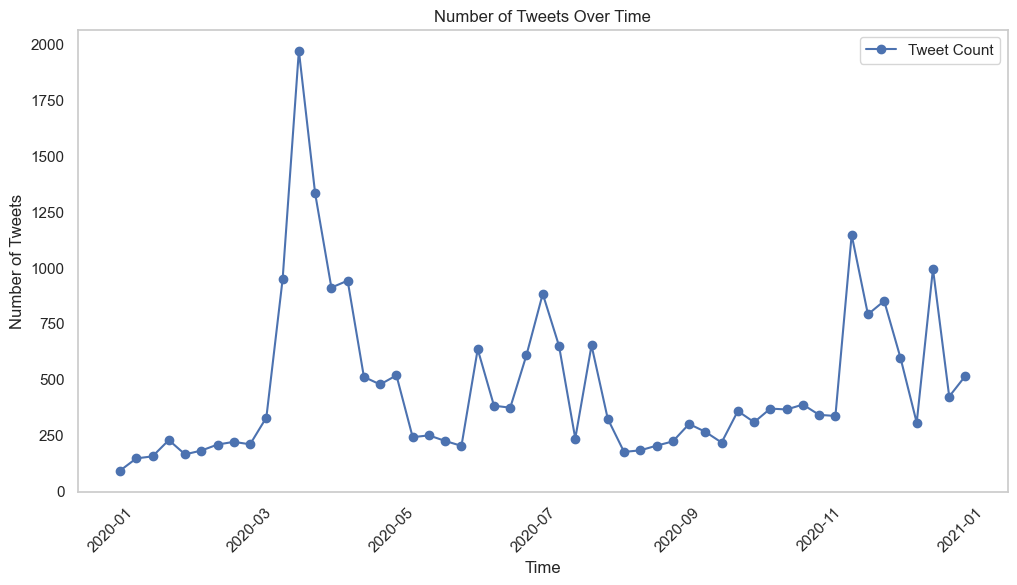

In [577]:
# Tweets by hour
time_series = df.set_index('created_at').resample('W').count()

# Draw a time series graph
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series['text'], marker='o', linestyle='-', color='b', label='Tweet Count')
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets Over Time')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [578]:
df["extended_tweet"].apply(lambda x: type(x)).value_counts()

extended_tweet
<class 'NoneType'>    16365
<class 'str'>          8437
Name: count, dtype: int64

In [579]:
df["entities"].apply(lambda x: type(x)).value_counts()

entities
<class 'str'>    24802
Name: count, dtype: int64

In [580]:
print(df["extended_entities"].iloc[8])

{'media': [{'id': 1219187533080223746, 'id_str': '1219187533080223746', 'indices': [99, 122], 'media_url': 'http://pbs.twimg.com/tweet_video_thumb/EOtsmg_U4AIr8Zj.jpg', 'media_url_https': 'https://pbs.twimg.com/tweet_video_thumb/EOtsmg_U4AIr8Zj.jpg', 'url': 'https://t.co/zn4xUNidL4', 'display_url': 'pic.twitter.com/zn4xUNidL4', 'expanded_url': 'https://twitter.com/EngenieBates/status/1219187540755914753/photo/1', 'type': 'animated_gif', 'video_info': {'aspect_ratio': [249, 139], 'variants': [{'bitrate': 0, 'content_type': 'video/mp4', 'url': 'https://video.twimg.com/tweet_video/EOtsmg_U4AIr8Zj.mp4'}]}, 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 498, 'h': 278, 'resize': 'fit'}, 'small': {'w': 498, 'h': 278, 'resize': 'fit'}, 'medium': {'w': 498, 'h': 278, 'resize': 'fit'}}}]}


In [581]:
# Converts strings in extended_tweet and entities into dictionaries for easy extraction of information

In [582]:
def parse_python_dict_str(s):
    if s is None:
        return None
    if not isinstance(s, str):
        return s
    try:
        return ast.literal_eval(s)
    except (SyntaxError, ValueError):
        return None

In [583]:
df["extended_tweet"] = df["extended_tweet"].apply(parse_python_dict_str)
df["entities"] = df["entities"].apply(parse_python_dict_str)

In [584]:
# Extract full text
df["full_text"] = [x["full_text"] if x!=None else None for x in df["extended_tweet"]]
df["full_text"] = [y if x==None else x for x,y in zip(df["full_text"],df["text"])]

In [585]:
df['full_text']

0        RT @HelpThemHelpUs_: Our friends at @Potsandco...
1        @HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...
2        @waitrose the wine you delivered yesterday was...
3        RT @jlandpartners: This Christmas we want to #...
4        RT @RebeccaTillett1: @waitrose if the U.K. ach...
                               ...                        
24797    @YummyTim @Wine_and_Rugby @UKHospKate @waitros...
24798    RT @SAMPAuk_: @JoJomorris1 @waitrose @Tesco @M...
24799    @TeaTrayThomas @NHSuk @sainsburys @Tesco @asda...
24800    I signed the open letter asking @Tesco @asda @...
24801    Complex, fruity with a smoky finish says @wait...
Name: full_text, Length: 24802, dtype: object

In [586]:
print(df["full_text"].iloc[7])

@NLeespeaking @laworfiction @waitrose @Francis_Hoar How do you know this man is exempt? With no visual clue you have to ask!


## 2. Data Cleaning

## 2.1 Text Data Cleaning

In [589]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions

In [590]:
!pip install emoji
import emoji

In [591]:
# Remove URLs
def remove_URLs(text):
    return re.sub(r'((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)', ' ', text)
df["full_text"] = df["full_text"].apply(remove_URLs)

# Remove punctuation
def remove_punctuations(data):
    data = re.sub(r"[~.,%/:;?_&+*=!-]", " ", data)  
    data = re.sub(r'@\w+', '', data) # Delete all @usernames
    data = re.sub(r"#(\w+)", r"\1", data)  # Remove the #, but keep the topic
    return data

df["full_text"] = df["full_text"].apply(lambda x: remove_punctuations(x))

# Remove numbers
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)
df["full_text"] = df["full_text"].apply(lambda x: remove_numbers(x))

# Unified case
df["full_text"] = df["full_text"].str.lower()

# Remove non-English text
def remove_non_english(text):
    return re.sub(r'[^\x00-\x7F]+',' ', text)
df["full_text"] = df["full_text"].apply(remove_non_english)

# Remove stop words
stop_words = set(stopwords.words("english")).union({"amp"}) 
df["full_text"] = df["full_text"].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))


# Converting emojis into emotional expressions
df["full_text"] = df["full_text"].apply(lambda x: emoji.demojize(x)) 

# Delete duplicate tweets
df = df.drop_duplicates(subset=["full_text"])

# Remove words that are too short or too long
def filter_word_length(text):
    return " ".join([word for word in text.split() if 2 <= len(word) <= 15])
df["full_text"] = df["full_text"].apply(filter_word_length)

# Delete tweets with no text content
df = df[df["full_text"].notna() & (df["full_text"].str.strip() != "")]

In [595]:
df["full_text"]

0        rt friend pudding donating profit sale delicio...
1                               mlw go definitely shopping
2             wine delivered yesterday made violently sick
3        rt christmas want givealittlelove together mak...
4        rt achieves trade deal u waitrose commit label...
                               ...                        
24793                            cauliflower lemon blessed
24795    make donated food bank need get guaranteed wee...
24797    rugby true round way tesco free waitrose civil...
24799                                   great idea shelley
24801    complex fruity smoky finish say must say range...
Name: full_text, Length: 16702, dtype: object

In [596]:
#Tokenization
df["full_text"] = df["full_text"].apply(word_tokenize)
df["full_text"]

0        [rt, friend, pudding, donating, profit, sale, ...
1                          [mlw, go, definitely, shopping]
2        [wine, delivered, yesterday, made, violently, ...
3        [rt, christmas, want, givealittlelove, togethe...
4        [rt, achieves, trade, deal, u, waitrose, commi...
                               ...                        
24793                        [cauliflower, lemon, blessed]
24795    [make, donated, food, bank, need, get, guarant...
24797    [rugby, true, round, way, tesco, free, waitros...
24799                               [great, idea, shelley]
24801    [complex, fruity, smoky, finish, say, must, sa...
Name: full_text, Length: 16702, dtype: object

In [597]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df["full_text"] = df["full_text"].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x]))
df["full_text"]

0        rt friend pudding donating profit sale delicio...
1                               mlw go definitely shopping
2             wine delivered yesterday made violently sick
3        rt christmas want givealittlelove together mak...
4        rt achieves trade deal u waitrose commit label...
                               ...                        
24793                            cauliflower lemon blessed
24795    make donated food bank need get guaranteed wee...
24797    rugby true round way tesco free waitrose civil...
24799                                   great idea shelley
24801    complex fruity smoky finish say must say range...
Name: full_text, Length: 16702, dtype: object

In [598]:
# Sentiment analysis covers only non-retweeted tweets
df_cleaned = df[~df["full_text"].str.startswith("rt ")].copy()

print(f"Original dataset size: {df.shape[0]}")
print(f"Size of dataset after removing retweeted tweets: {df_cleaned.shape[0]}")

Original dataset size: 16702
Size of dataset after removing retweeted tweets: 13286


## 2.2 Data cleaning of mentioned users' information

In [607]:
df["mention_screen_names"] = [x["user_mentions"] for x in df["entities"]]
df["mention_screen_names"] = [[y["screen_name"] for y in x] for x in df["mention_screen_names"]]
mention_df = df[["mention_screen_names", "in_reply_to_screen_name"]].copy()
mention_df.head()

,mention_screen_names,in_reply_to_screen_name
0,"[HelpThemHelpUs_, Potsandco]",None
1,"[HOOODINIIII, roh17h, Samuel51, sainsburys, Ma...",HOOODINIIII
2,[waitrose],waitrose
3,"[jlandpartners, waitrose]",None
4,"[RebeccaTillett1, waitrose]",None


In [608]:
# Ensure that mention_screen_names only contains additional mentions of users in the tweet and not the direct replies to the tweet
# Keep only lines that mention multiple users.
mention_df["mention_screen_names"] = [list(set(x)-set([y])) for x,y in zip(mention_df["mention_screen_names"],mention_df["in_reply_to_screen_name"])]
mention_df = mention_df[[len(x)>1 for x in mention_df["mention_screen_names"]]]
mention_df.head()

,mention_screen_names,in_reply_to_screen_name
0,"[Potsandco, HelpThemHelpUs_]",None
1,"[roh17h, waitrose, Samuel51, sainsburys, Malco...",HOOODINIIII
3,"[waitrose, jlandpartners]",None
4,"[RebeccaTillett1, waitrose]",None
5,"[Morrisons, waitrose, Tesco, Ocado, asda, sain...",Peterkay2k11


In [609]:
import itertools
list(itertools.combinations([1,2,3],2))

[(1, 2), (1, 3), (2, 3)]

In [610]:
mention_df["mention_pair"] = [list(itertools.combinations(x,2)) for x in mention_df["mention_screen_names"]]
mention_df = mention_df[['mention_pair']].explode("mention_pair")
mention_df["user1"] = [x[0] for x in mention_df["mention_pair"]]
mention_df["user2"] = [x[1] for x in mention_df["mention_pair"]]
mention_df.head()

,mention_pair,user1,user2
0,"(Potsandco, HelpThemHelpUs_)",Potsandco,HelpThemHelpUs_
1,"(roh17h, waitrose)",roh17h,waitrose
1,"(roh17h, Samuel51)",roh17h,Samuel51
1,"(roh17h, sainsburys)",roh17h,sainsburys
1,"(roh17h, Malcolm_MLW1)",roh17h,Malcolm_MLW1


In [611]:
mention_df = mention_df.drop(columns=["mention_pair"])

In [612]:
mention_df["mention"] = 1
mention_df = mention_df.groupby(by=['user1','user2']).count().reset_index()
mention_df

,user1,user2,mention
0,007taxicab,MikeyCycling,1
1,007taxicab,waitrose,1
2,0Calamity,Morrisons,2
3,0Calamity,Tesco,2
4,0Calamity,asda,2
...,...,...,...
26573,zoozoo2,Op_Homefront,1
26574,zoozoo2,SSVeterans,1
26575,zoozoo2,TheDepotVC,1
26576,zoozoo2,VnF_LP,1


## 3. Social network analysis

In [614]:
# Co-mention network

In [615]:
!pip install adjustText
from adjustText import adjust_text

In [616]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

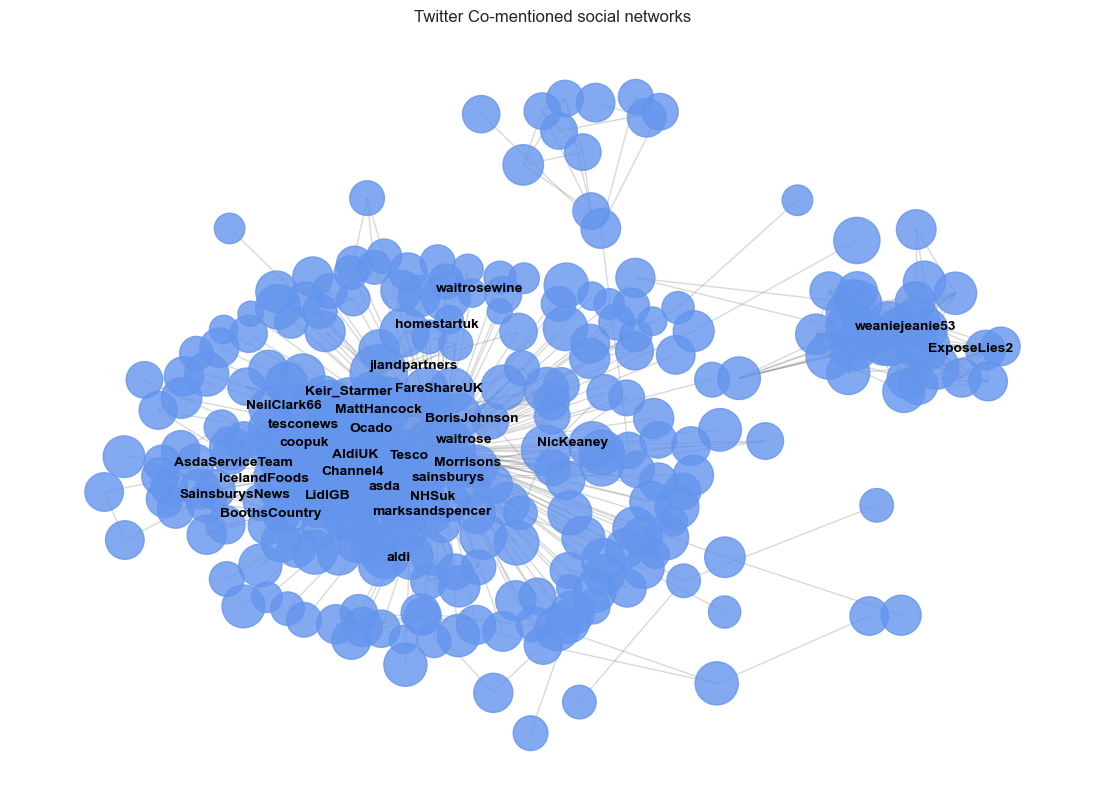

In [617]:
# Create undirected graphs
G = nx.from_pandas_edgelist(mention_df, 'user1', 'user2', ['mention'], create_using=nx.Graph())

# Calculate node degree
degree_dict = dict(G.degree())

# Set mention filtering thresholds
mention_threshold = 5 
filtered_edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['mention'] > mention_threshold]
G_filtered = nx.Graph()
G_filtered.add_edges_from(filtered_edges)

# Recalculate the layout
pos = nx.spring_layout(G_filtered, k=0.3, seed=42)

# Resize nodes, logarithmic scaling to avoid over-scaling
node_sizes = [np.log(degree_dict[node] + 1) * 300 for node in G_filtered.nodes()]

# Selection of the top 10 key nodes
sorted_nodes = sorted(G_filtered.nodes(), key=lambda node: degree_dict.get(node, 0), reverse=True)
top_10_percent_nodes = sorted_nodes[:max(1, len(sorted_nodes) // 10)]  # 确保至少 1 个节点有标签

plt.figure(figsize=(14, 10))

nx.draw_networkx_nodes(G_filtered, pos, node_size=node_sizes, node_color="cornflowerblue", alpha=0.8)

# Improvement of the transparency of the edges
nx.draw_networkx_edges(G_filtered, pos, edge_color='gray', alpha=0.3, width=1)

# Automatic optimisation of tags
texts = []
for node, (x, y) in pos.items():
    if node in top_10_percent_nodes:
        texts.append(plt.text(x, y, node, fontsize=10, fontweight="bold", color="black", ha='center'))

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))  

plt.title("Twitter Co-mentioned social networks")
plt.axis("off")
plt.show()

In [619]:
#Centrality Measures

In [620]:
# Calculation of centrality indicators
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight='mention')
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

centrality_df = pd.DataFrame({
    "Degree Centrality": degree_centrality,
    "Betweenness Centrality": betweenness_centrality,
    "Closeness Centrality": closeness_centrality,
    "Eigenvector Centrality": eigenvector_centrality,
})

centrality_df = centrality_df.sort_values(by="Degree Centrality", ascending=False)
centrality_df.head(20)

,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality
waitrose,0.821597,0.775651,0.831114,0.505591
Tesco,0.232326,0.039727,0.524037,0.251565
sainsburys,0.222623,0.036523,0.520192,0.244071
asda,0.143471,0.011716,0.495505,0.177740
Morrisons,0.138619,0.014749,0.494277,0.172089
AldiUK,0.120599,0.011579,0.488486,0.152762
LidlGB,0.107984,0.006551,0.484701,0.145781
marksandspencer,0.063626,0.008052,0.472355,0.085389
coopuk,0.060438,0.015053,0.470578,0.083550
Ocado,0.046437,0.004069,0.465632,0.061895


C:\Users\菀得\AppData\Local\Temp\ipykernel_28552\1116124175.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\菀得\AppData\Local\Temp\ipykernel_28552\1116124175.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\菀得\AppData\Local\Temp\ipykernel_28552\1116124175.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\菀得\AppData\Local\Temp\ipykernel_28552\1116124175.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set 

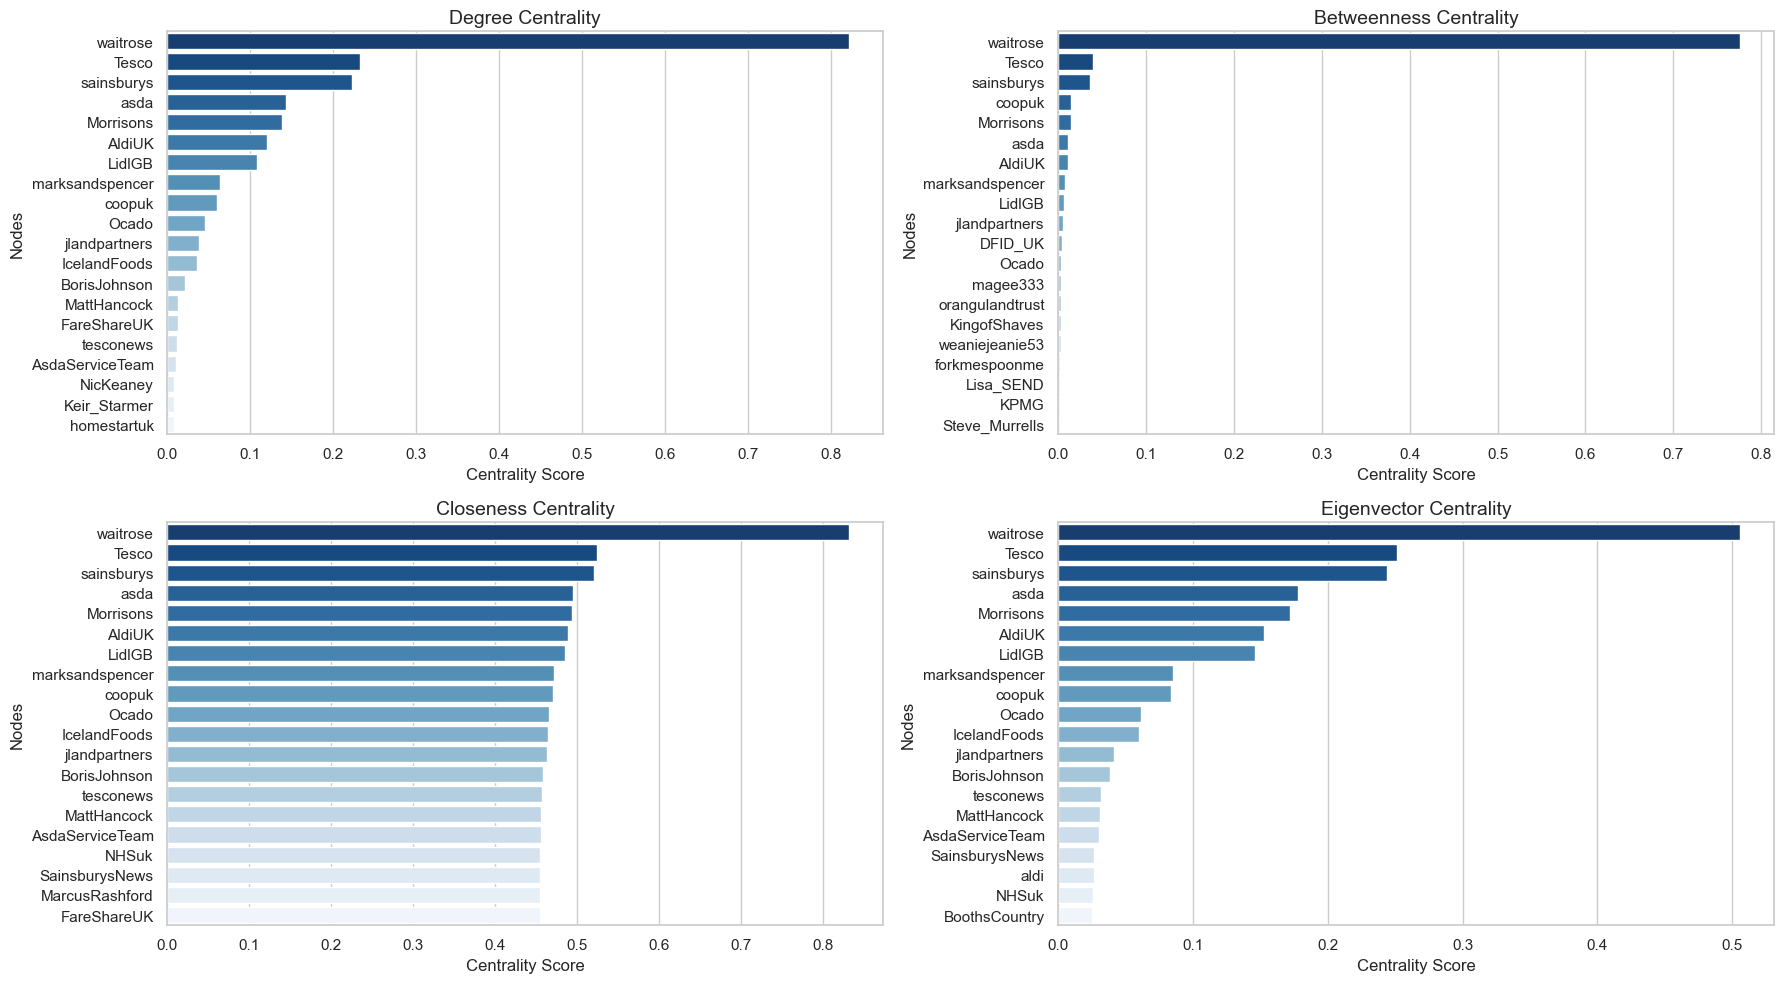

In [621]:
# Choose the first 20 nodes for visualisation
top_n = 20
centrality_metrics = ["Degree Centrality", "Betweenness Centrality", 
                      "Closeness Centrality", "Eigenvector Centrality"]

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))  
axes = axes.flatten()

for i, metric in enumerate(centrality_metrics):
    top_nodes = centrality_df[metric].nlargest(top_n)  
    sns.barplot(
        x=top_nodes.values, 
        y=top_nodes.index, 
        ax=axes[i], 
        palette="Blues_r"
    )
    axes[i].set_title(metric, fontsize=14)
    axes[i].set_xlabel("Centrality Score", fontsize=12)
    axes[i].set_ylabel("Nodes", fontsize=12)


plt.tight_layout()
plt.show()

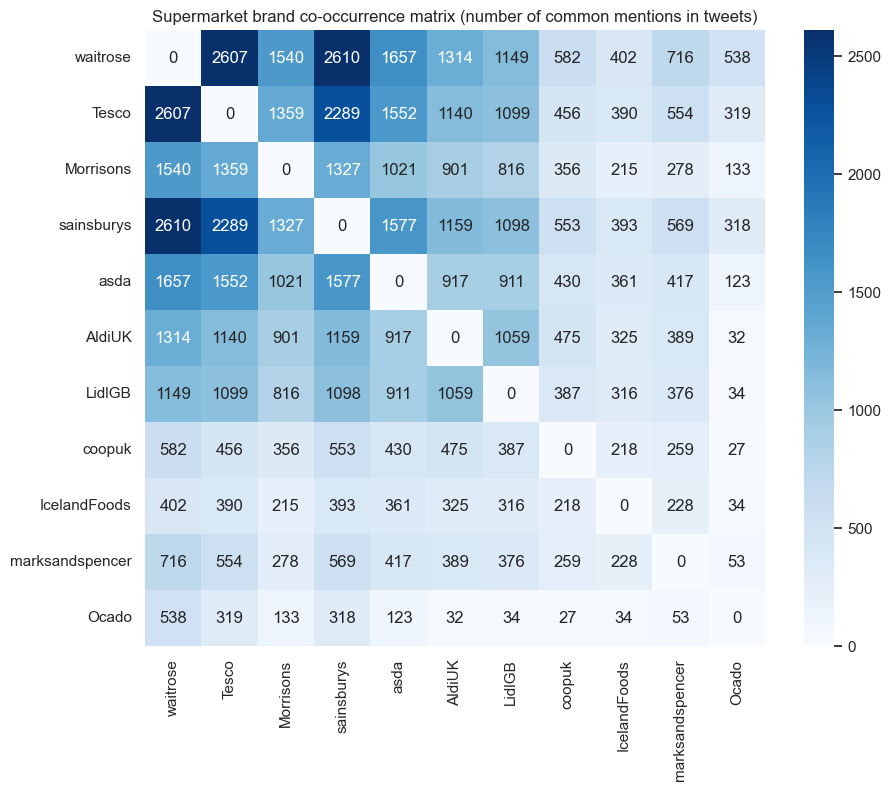

In [622]:
# Filter tweets that include brands
brand_list = ["waitrose", "Tesco", "Morrisons", "sainsburys", "asda", "AldiUK", "LidlGB", "coopuk", "IcelandFoods", "marksandspencer", "Ocado"]
df['brand_mentions'] = df['mention_screen_names'].apply(lambda x: [b for b in brand_list if b in x])

# Calculate brand co-mention frequency
co_occurrence = Counter()
for brands in df['brand_mentions']:
    for pair in combinations(brands, 2):  
        co_occurrence[pair] += 1

co_matrix = pd.DataFrame(index=brand_list, columns=brand_list, data=0)
for (b1, b2), count in co_occurrence.items():
    co_matrix.loc[b1, b2] = count
    co_matrix.loc[b2, b1] = count 

plt.figure(figsize=(10, 8))
sns.heatmap(co_matrix.astype(int), annot=True, fmt="d", cmap="Blues")
plt.title("Supermarket brand co-occurrence matrix (number of common mentions in tweets)")
plt.show()


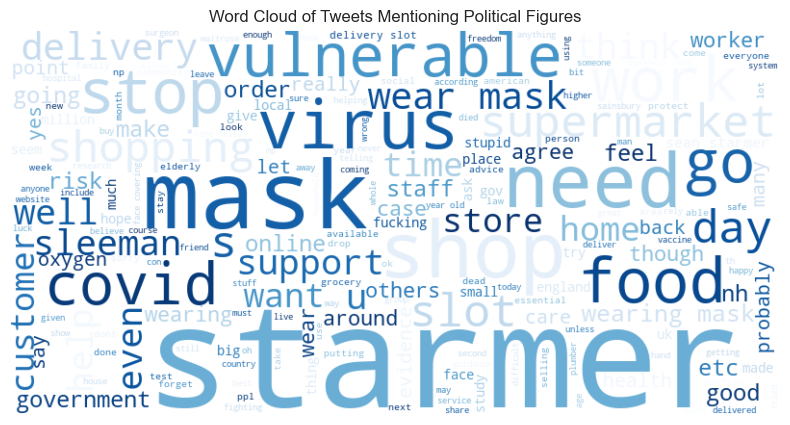

In [630]:
# Filtering tweets containing repeated mentions of political celebrities
political_figures = ["BorisJohnson", "Keir_Starmer", "MattHancock"]
df_political = df[df['mention_screen_names'].apply(lambda x: any(person in x for person in political_figures))]

custom_stopwords = STOPWORDS.union({"rt", "one", "see", "know", "people", "please", "thank", "something"})  

all_text = " ".join(df_political["full_text"])

# Generating Word Clouds
wordcloud = WordCloud(
    width=800, height=400, 
    background_color='white', 
    colormap='Blues',
    max_words=200, 
    stopwords=custom_stopwords,  
    contour_color='steelblue', 
    contour_width=2
).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  
plt.title("Word Cloud of Tweets Mentioning Political Figures")
plt.show()


## 4. Combining sentiment analysis and topic modelling

## 4.1 Sentiment analysis

In [632]:
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [633]:
# Using pre-trained models for sentiment scoring
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df_cleaned["sentiment_scores"] = df_cleaned["full_text"].apply(lambda x: sia.polarity_scores(x))
df_cleaned["sentiment_compound"] = df_cleaned["sentiment_scores"].apply(lambda score_dict: score_dict['compound'])

# Mapping sentiment scores to labels (positive, neutral, negative)
def classify_sentiment(compound):
    if compound >= 0.05:
        return "positive"
    elif compound <= -0.05:
        return "negative"
    else:
        return "neutral"

df_cleaned["sentiment_label"] = df_cleaned["sentiment_compound"].apply(classify_sentiment)

print(df_cleaned[["full_text", "sentiment_label"]].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\菀得\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                           full_text sentiment_label
1                         mlw go definitely shopping        positive
2       wine delivered yesterday made violently sick        negative
5  support advice worker affected coronavirus fol...        positive
7               hoar know man exempt visual clue ask        positive
8                 let 's environment saving together         neutral


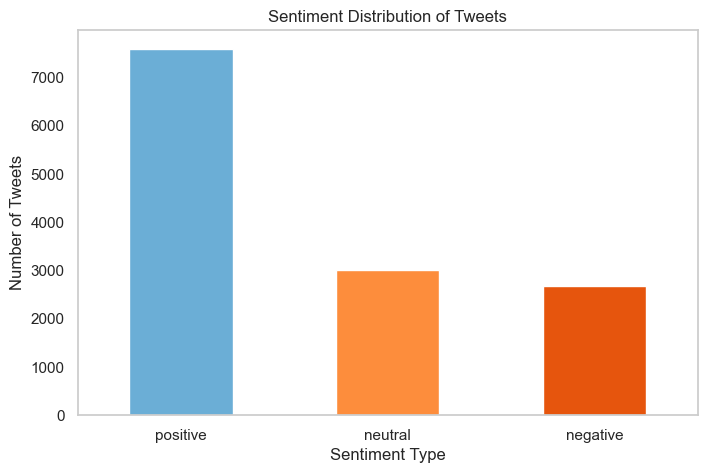

In [636]:
df_cleaned["sentiment_label"].value_counts().plot(
    kind='bar',
    figsize=(8, 5),
    color=['#6BAED6', '#FD8D3C', '#E6550D'] 
)

plt.title("Sentiment Distribution of Tweets")
plt.xlabel("Sentiment Type")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

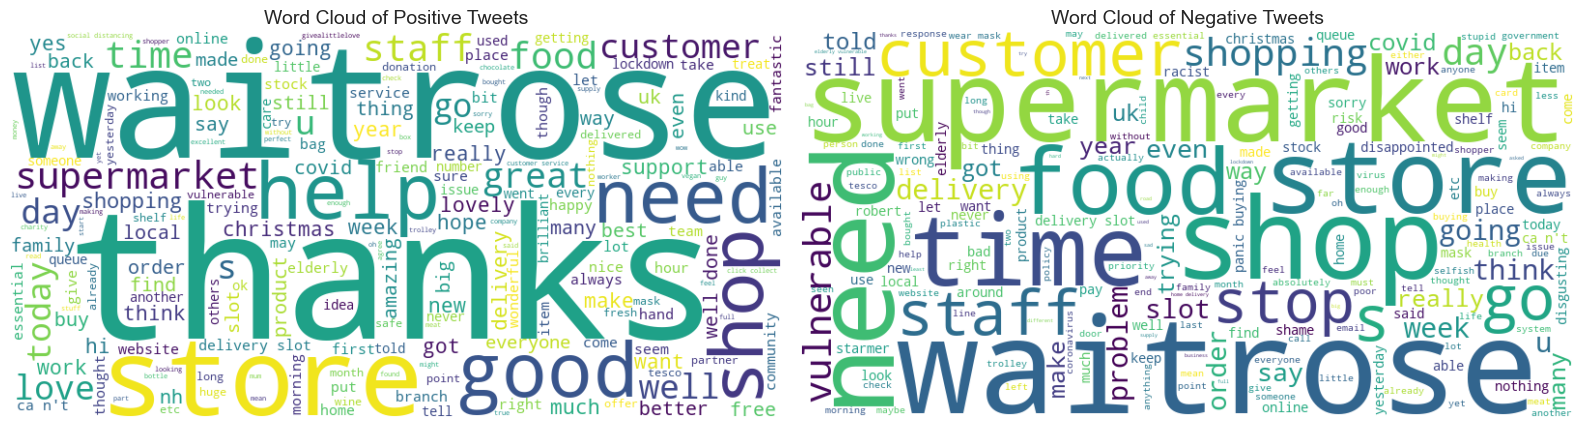

In [641]:
# Extract the text of positive and negative tweets
positive_text = " ".join(df_cleaned[df_cleaned["sentiment_label"] == "positive"]["full_text"])
negative_text = " ".join(df_cleaned[df_cleaned["sentiment_label"] == "negative"]["full_text"])

# Positive word cloud
positive_wc = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(positive_text)

# Negative word cloud
negative_wc = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(negative_text)


plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Tweets", fontsize=14)

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Tweets", fontsize=14)

plt.tight_layout()
plt.show()

C:\Users\菀得\AppData\Local\Temp\ipykernel_28552\3012024766.py:4: DeprecationWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sentiment_over_time = df_cleaned.set_index('created_at').groupby('sentiment_label').resample('W').size().unstack(0)


<Figure size 1200x600 with 0 Axes>

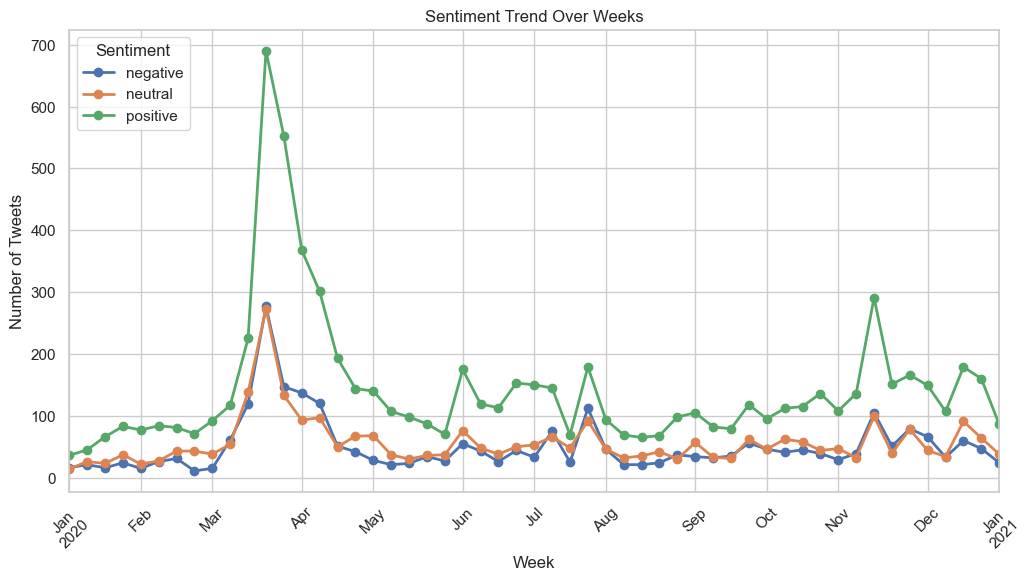

In [642]:
# Plotting line graphs of emotion over time (by week)
df_cleaned['created_at'] = pd.to_datetime(df_cleaned['created_at'])

sentiment_over_time = df_cleaned.set_index('created_at').groupby('sentiment_label').resample('W').size().unstack(0)

plt.figure(figsize=(12, 6))
sentiment_over_time.plot(kind='line', marker='o', figsize=(12, 6), linewidth=2)

plt.title("Sentiment Trend Over Weeks")
plt.xlabel("Week")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment", loc="upper left")
plt.xticks(rotation=45)  
plt.grid(True)

plt.show()

## 4.2 Topic Modelling

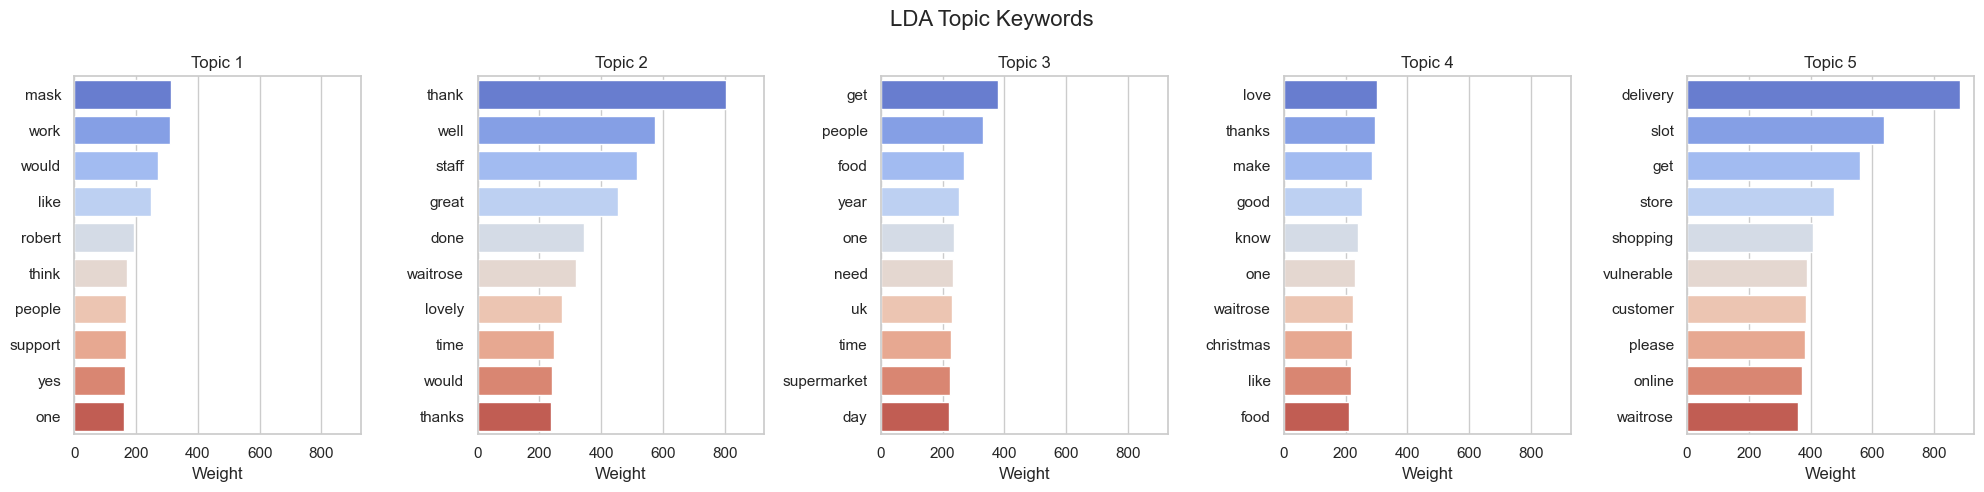

In [645]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# LDA modelling
count_vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.8)
count_matrix = count_vectorizer.fit_transform(df_cleaned["full_text"])

lda_model = LatentDirichletAllocation(n_components=5, random_state=0)
lda_result = lda_model.fit_transform(count_matrix)

# Mapping topics and keywords
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        sns.barplot(x=weights, y=top_features, ax=ax, hue=top_features, palette="coolwarm", legend=False)
        ax.set_title(f'Topic {topic_idx +1}')
        ax.set_xlabel('Weight')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

n_top_words = 10
tf_feature_names = count_vectorizer.get_feature_names_out()
plot_top_words(lda_model, tf_feature_names, n_top_words, 'LDA Topic Keywords')

In [648]:
# Map subject numbers to clear topic labels
df_cleaned["dominant_topic"] = lda_result.argmax(axis=1)

topic_keywords = {
    0: "Staff Service and COVID Measures",
    1: "Positive Customers Feedback",
    2: "Essential Supplies and Public Demand",
    3: "Holiday Shopping Experience and Sentiment",
    4: "Online Orders and Customer Service"
}

df_cleaned["topic_label"] = df_cleaned["dominant_topic"].map(topic_keywords)

print(df_cleaned[["dominant_topic", "topic_label"]].head())

   dominant_topic                                topic_label
1               0           Staff Service and COVID Measures
2               3  Holiday Shopping Experience and Sentiment
5               1                Positive Customers Feedback
7               3  Holiday Shopping Experience and Sentiment
8               0           Staff Service and COVID Measures


## 4.3 Sentiment analysis and topic modelling

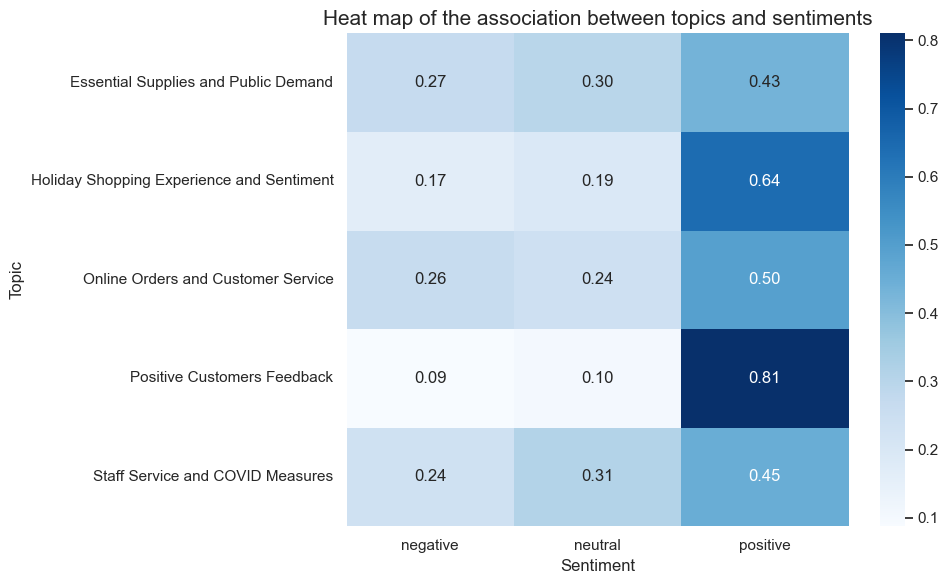

In [649]:
# Heat maps of sentiment - topics
heatmap_data = pd.crosstab(df_cleaned["topic_label"], df_cleaned["sentiment_label"], normalize='index')

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt=".2f")

plt.title('Heat map of the association between topics and sentiments', fontsize=15)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Topic', fontsize=12)
plt.tight_layout()
plt.show()